<a href="https://colab.research.google.com/github/Feilusun/QM2/blob/main/Text_Analysis_%26_Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The top 8 districts for FSM educational attainment are all in London, all 8 are in North London, 5 are in North East London and 3 in North West

The bottom 8 districts are more spread out. 2 are in North West England, 5 are in the East Midlands and 1 is in the East of England.

We will be conducting whether there is a difference between whether or not the politicians representing these areas use different language from each other, and whether any observed differences are statistically significant.

Below are the load in statements:

In [33]:
!pip install scattertext

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from IPython.display import HTML
import scattertext as st
import pandas as pd
import spacy
from scattertext import produce_scattertext_explorer, CorpusFromPandas

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 53.3 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9298 sha256=6c4106cd929b77da2f3dde9bd4acd1157a1c83c7138815815f358fd904037899
  Stored in directory: /root/.cache/pip/wheels/bc/be/39/c37ad168eb2ff644c9685f52554440372129450f0b8ed203dd
Successfully built flashtext


*As* a starting point, I have manually entered transcripts of every time the one of the 2 politicians representing the Harrow area for years 2014, 2015 and 2016 (Gareth Thomas and Bob Blackman) have spoken in parliament and mentioned the word 'education' within this timeframe. This will be changed to whichever politicians of interest we wish to analyse.

In [34]:
text = """
DATE: 21/07/2016
Prior to the Secretary of State’s appointment, the noises coming out of the Department for Education suggested that London schools, in particular, would be seriously hit by the changes to the funding formula. Schools in Harrow have been advised that they will face a real-terms budget cut of between 3% and 8% as a result of the changes that her Department is considering. Can she offer any reassurance to the headteachers and parents in my constituency that that will not be the case?

DATE: 10/12/2015
I beg to move, That the clause be read a Second time.

I am delighted to move the new clause and highlight the need for more construction apprenticeships. The new clause, which for want of a better phrase is a probing new clause, suggests that in proposals for sites where 50 or more dwellings are to be constructed, there should be a guarantee that local people can be offered apprenticeships. The Minister should take that seriously.

The Federation of Master Builders highlighted the shortage of skilled workers in the construction industry, which could scupper the vision for the new affordable homes that we all want. Brian Berry, the chief executive of the FMB, said last month:

“Unless we see a massive uplift in apprenticeship training in our industry, there won’t be enough pairs of hands to deliver more housing on this scale.”

I looked in detail to see where the shortages lay. According to the FMB’s state of trades survey:

“In Q2 of 2015 49% of FMB members were having difficulties recruiting bricklayers and 47% carpenters and joiners.”

The FMB also said:

“Another recent FMB poll of members found that two thirds had had to turn down work because of their inability to recruit the skilled labour they need.”

A significant number of its members saw that as a “major barrier” to their ability to build more homes in the next 12 months, and a third were worried looking three years ahead.

One worries that small and medium-sized house builders will suffer most from the shortage of skilled labour. I remind the Committee of my previous comments about the decline in the number of small and medium-sized house builders over the past 25 years or more. A shortage of labour is no doubt an issue for small and medium-sized house builders. We have the problem of access to finance on the one hand, and if we add to that the shortage of skilled labour, we risk seeing even greater concentration in the house building sector.

Just before he stepped down from Parliament earlier this year, the excellent Nick Raynsford, then the Member for Greenwich and Woolwich, chaired a cross-party parliamentary inquiry into apprenticeships with the noble Lord Best. The inquiry drew attention to the 1 million 16 to 24-year-olds who are not in education, employment or training, as well as the fact that we will need an extra 182,000 construction workers by 2018. It also highlighted that just 7,280 people had completed a construction apprenticeship in 2013, and that even though there had been a rise in the number of apprenticeships in other areas, there continued to be a significant shortage in the construction industry.

Between 2008 and 2011, the Homes and Communities Agency had guidelines that required housing associations to initiate apprenticeships as they got money to build new homes, which helped to generate more than 4,000 apprenticeships in that three-year period. The guidelines were lifted in 2011, when, as the agency said in evidence to the cross-party inquiry, they were clearly beginning to make a significant difference. That is a disappointment.

DATE: 27/05/2015
I welcome my hon. Friend’s intervention. I hope that he will agree with me on this, too: there is now a democratic deficit in this capital city. London did not vote for austerity on the scale we can expect. London did not vote for cuts in the NHS. London did not vote for cuts—to our police, our schools or the services our councils provide—on the scale that is set to befall our great city. I gently say again to the House that London deserves better. It is time to start a proper debate about the devolution of further responsibilities and about income tax being devolved to London.

Many international cities derive income from a local income tax, including, I am told, New York, Berlin and Madrid. In the UK, there is already a precedent with Scotland having the power to set income tax. Given the huge contribution that London makes to the rest of Britain, it is not identity politics that drives the case for further devolution; it is economic and social imperatives.

The London Finance Commission argued that property taxes should be devolved first and that is right, but it also concluded that, if greater powers, for example, in welfare, health or education were devolved to London, the option of devolving or assigning income tax in London should be revisited. I believe that moment is now. If Greater Manchester is being invited to shape the future of its health and social care, I believe London should be invited to do so, too.

The London Challenge helped to drive up standards in education. I believe that it should be re-established and London given more collective responsibility to champion stronger standards and higher achievement in our schools. Skills and employment training budgets should be devolved, too.

These are, I recognise, big judgment calls for London itself and for the country as a whole. I disagree with many of the current Mayor’s choices, but the mayoralty throughout the terms of its two incumbents has demonstrated generally sound management of major public services, notwithstanding the current garden bridge plans. I believe that it is time to establish a cross-party, cross-government inquiry, with business and other key stakeholders closely involved, and with the remit to explore both the case for devolution of further responsibilities to London and the case for devolving further taxation powers. The next Mayor, even if they serve for two full terms, may not be the Mayor who sees responsibility for income tax devolved to them, but I believe profoundly that it is time for London to accelerate its path to proper devolution. We should, for example, consider the case for more local control of London’s NHS. I want the NHS to continue to be a truly national service. I think there is a need for national targets—cancer and waiting times being two key yardsticks by which to judge quality of service—but it is surely right that Londoners have more control themselves over services we value so highly.

Why should London not have responsibility for the decision on whether to introduce a London living wage, of course after consultation, not least with business? Why does that power need to rest with Ministers instead of Londoners? Why cannot we in London decide whether to control the cost of renting? Londoners together should be able to make these decisions, not have them dictated to us.

Any further devolution of tax powers and extra responsibilities will inevitably require scrutiny over how London is governed and whether the current divide in powers between Mayor and local boroughs and the Assembly are correct. Instinctively, I believe more power should be devolved to London’s boroughs. City Hall has often felt remote from outer-London suburbs, but I suspect it has not always felt terribly helpful to some inner-London boroughs either. A root and branch review of the powers and effectiveness of City Hall and the Greater London Assembly ought to be part of the work of a commission looking at future devolution. I say that recognising the skill, hard work and powerful contributions of many in the Greater London Assembly, not least many of my own colleagues.

London is a great city, the envy of many worldwide, but we face huge challenges as our city grows even bigger. Certainly we look to this great House to help, but in London we have the imagination, the talent and the wealth to confront head on the issues that hold our city back or hold back the ambitions of our neighbours and fellow citizens. If others in this great country have succeeded in securing greater powers to control and shape the response to their problems, why should not Londoners expect their Mayor to have the powers to be able to act?

I want London to continue to play a leading role in the UK. Indeed, I want London to lead the UK. But for that to happen, Londoners need to be able to lead London’s future.

DATE: 06/11/2014
It is a pleasure to follow the hon. Member for Tiverton and Honiton (Neil Parish) and to participate in this debate, having had the opportunity to listen to some speeches that were extremely thoughtful and provocative in the best sense. In that regard, I pay particular tribute to my right hon. Friend the Member for Blackburn (Mr Straw) for his continuing considered interest in Iran, and to the debate’s other sponsor, the hon. Member for South Norfolk (Mr Bacon).

In its recent report on UK policy towards Iran, the Foreign Affairs Select Committee rightly said that it would be in the UK’s interest to have a mature and constructive relationship with Iran. In that context, the Government were right to take the in-principle decision to reopen the embassy in Tehran, and the Prime Minister was right to meet President Rouhani in September.

Despite these recent important steps, there are many reasons for considerable caution and care in our engagement with Iran, not least because the 24 November deadline for reaching a comprehensive deal that limits Iran’s nuclear programme is approaching fast. Scepticism about Iran’s motives and intentions for these negotiations is hardly surprising, given the country’s links to terrorist organisations, the routine failure of its politicians to recognise Israel’s right to exist, its support for the Assad regime and the widespread concern that it has in the past actively sought a nuclear weapons capability.

This debate, then, is a welcome opportunity to explore the progress that has been made in the nuclear negotiations, and to examine the progress—or the lack of it—on other aspects of our policy towards Iran, including its future role in the region and its attitude to its people and their rights.

Almost a year ago, my right hon. Friend the shadow Foreign Secretary welcomed the efforts of the Government, and particularly those of Baroness Ashton, as part of the E3 plus 3 to conclude a thorough and detailed interim agreement in the nuclear negotiations with Iran. As others have said, that included a joint plan of action with a series of crucial commitments—commitments that, if implemented properly, would mean that the aspects of Iran’s nuclear programme that were thought to pose the greatest risk could not be developed further during the period of the interim agreement. In addition, some of the most disturbing parts of Iran’s nuclear programme to date would be significantly scaled back, including the eradication of around 200 kg of 20%-enriched uranium. I look forward to hearing the Minister’s assessment of the extent to which the commitments in this joint plan of action have been adhered to and can be built on.

That interim agreement also set out the elements of what a comprehensive agreement could look like: adherence to Iran’s obligations and rights under the non-proliferation treaty and IAEA safeguards; full resolution of concerns around the heavy water research reactor at Arak; agreed transparency and monitoring; and co-operation on Iran’s civilian nuclear programme. In return for confidence that Iran’s programme is solely peaceful, the plan of action suggests a mutually defined, enrichment-based programme, with agreed parameters and limits—but only as part of a comprehensive agreement. Sanctions would begin to be further lifted at that point.

Others close to the negotiations, notably in the US, have suggested that all the components of a plan for a long-term definitive agreement that should be acceptable to both sides are on the table. As my right hon. Friend the shadow Foreign Secretary and, indeed, the Foreign Secretary noted, it is the pressure of sanctions, albeit coupled with a readiness to negotiate, that has helped bring Iran to the negotiating table and helped to achieve the progress that has been made.

As the right hon. Member for Croydon South (Sir Richard Ottaway), who is the Chair of the Foreign Affairs Select Committee, and indeed the right hon. Member for Mid Sussex (Sir Nicholas Soames), pointed out, one crucial test of Iran’s willingness to engage with the profound concerns about possible military dimensions to its nuclear programme surrounds the access given to the IAEA to its nuclear sites and staff. There remain concerns that IAEA inspectors still do not have full access to every one of Iran’s nuclear sites—for example, I understand that Iran has agreed only to limited inspections by the IAEA at its main enrichment facilities at Fordow and Natanz. IAEA inspectors still do not have access to the heavy water second reactor being built at Arak or to the Parchin military base, mentioned by the hon. Member for Hendon (Dr Offord), where the IAEA and others suspect Iran has attempted to develop a nuclear explosive device in the past. Perhaps the Minister will outline how this critical issue of IAEA access for monitoring is being addressed in the negotiations.

I recognise the importance of reaching a deal, both in building a little more trust in Iran towards the west and in keeping the more reactionary forces in Iran at bay, but negotiations cannot be allowed simply to drag on and on. Can the Minister reassure us that the Iranian side is fully engaged in the negotiations and remains committed to the 24 November deadline? Also, what steps would be taken if agreement were not achieved? Would sanctions that were lifted when the interim agreement was concluded last November, for example, be re-imposed?

There has been little public discussion to date about the role Iran is playing or might play in the future in the international effort against ISIL. Some have suggested that the threat ISIL poses in the region should be a reason for more flexibility towards Iran in these nuclear negotiations. I have to say that I do not agree. If there were not a willingness by the Iranians to build the trust of the international community on the nuclear issue, we could be replacing one very difficult threat with the re-emergence of another very significant threat. I hope, instead, that these negotiations will help to build further the scope, if not for trust, at least for better communication on a wider range of issues where our interests are aligned, of which the threat ISIL poses is clearly the most significant at the moment.

There have been reports of Iranian troops on the ground in Iraq, although there has been no formal announcement. Will the Minister set out his assessment of Iran’s role in resisting ISIL both in Iraq and Syria? Iran continues to have a choice as to whether to be a force for stability in the region. Its record to date has been decidedly mixed. It has a history of supporting the Assad regime in Syria and supporting and supplying a series of highly divisive and terrorist groups in the region which pose a continued threat to our allies there, including, but not only, Israel. It would be useful to hear from the Minister about the efforts that he and other Ministers have made in encouraging Iran to take a different approach to regional stability.

Many Members have mentioned the reopening of the embassy, which is, as they have said, a potentially important step in expanding bilateral engagement with the Iranians. An embassy, and diplomatic representation, would help us to develop relationships and gather information, which is essential, over time, to the building of trust and the facilitation of constructive dialogue, and which—again, over time—could perhaps influence attitudes and events for the better. Will the Minister update the House on progress towards the reopening of the embassy? In particular, will he deal with the suggestion by my right hon. Friend the Member for Blackburn that concerns in the Home Office are holding up the issuing of a timetable? Will he also tell us what further action has been taken, or consideration given, to ensure that staff will be safe and secure at the embassy in the future, in the light of the events in 2011 to which the hon. Member for North West Norfolk (Mr Bellingham) alluded?

As a number of Members have pointed out, Iran’s human rights record continues to be of deep concern. At the weekend it was reported that the British-Iranian women’s rights activist Ghoncheh Ghavami had been found guilty of spreading anti-regime propaganda and sentenced to a year in prison after being detained for trying to watch a men’s volleyball match. My hon. Friends the Member for Hammersmith (Mr Slaughter) and for Hackney North and Stoke Newington (Ms Abbott) expressed the profound concern that I am sure we all feel about her imprisonment and sentencing. Amnesty International has described her as a prisoner of conscience, and has raised concerns that Ghoncheh and her fellow demonstrators were beaten by police officers when they were arrested.

There have been widespread reports of torture and ill treatment in Iranian prisons, including sexual violence, severe beatings, denial of medical treatment, and long periods of solitary confinement. The number of executions is up. Indeed, as we heard from the hon. Member for Tiverton and Honiton (Neil Parish), Iran has the highest execution rate per capita in the world. Reyhanah Jabbari was executed on 25 October for killing a former intelligence officer after she had alleged that he had attempted to rape her. Amnesty International has said that it believes the court’s impartiality may have been affected by the victim’s connections with the Ministry of Intelligence. In addition, human rights defenders, journalists and bloggers have been arrested and their work censored.

While in theory Judaism, Christianity and Zoroastrianism are recognised alongside Islam, religious minorities continue to face discrimination, with converts particularly affected. That point was made by the hon. Member for Portsmouth South (Mr Hancock). There have been reports of harassment, desecration of religious sites, restricted access to education and employment, and even arrest and torture. Members of the Baha’i faith, which is not recognised, have been especially discriminated against. The situation for lesbian and gay people is profoundly worrying. Homosexual acts are criminalised, gay people are executed simply for being gay, and many lesbian and gay people have reported that they have been denied access to education or dismissed from employment once their sexuality has become known. Last week, the Iranian delegation to the United Nations Human Rights Council’s periodic review of the human rights situation in Iran again appeared dismissive of concerns.

DATE: 24/03/2014
The Secretary of State will recognise that Al-Madinah and IES UK Breckland schools have not been the greatest advert for his policy agenda. How will these rather Soviet-sounding commissioners help to ensure that academy chains and free schools are properly overseen so that no more children have their education damaged in future?

"""

text2 = """
DATE: 14/12/2016
Having wrestled with the education funding formula in local government for 20 years before I was elected to this place, I welcome the principle of fair funding, and in particular sparsity and the other elements contained within it. However, as a fellow London MP, my right hon. Friend will know that the cost of living in London is much higher than in the rest of the country. With 85% of a school’s budget typically spent on staffing, the need to pay staff extra salaries for recruitment and retention is paramount, so will she outline what extra money will be given to cover the cost of living and to protect schools from losing money?

DATE: 01/12/2016
I thank hon. Members for the amendments they have tabled and for the debate we have had. I reiterate to the hon. Member for Sheffield South East that we are not talking about mere guidance; local authorities will be ordered to take into account matters of education and employment, and the other aspects he mentioned. We wish to proceed in this Committee by consensus and discussion. If we can agree on that, it is going to help considerably.

Clause 3 will require local housing authorities to carry out an assessment for all cases in which an applicant is homeless or threatened with homelessness. The housing authority will have to look at the circumstances that caused the person to become homeless, or that threatened them with homelessness, which will be specific to that person, and it will have to look at the person’s housing and support needs.

Following the assessment, the authority must work with the applicant to agree what steps need to be taken by the applicant to secure and retain suitable accommodation, and what steps need to be taken by the authority to help them. The steps must be notified to the applicant in writing, in the form of an agreed plan, which will mean that applicants will be clear on what steps they, as well as the local authority, need to take to get accommodation.

There may be circumstances in which agreement cannot be reached. If that is the case, the local authority must record the reasons why and provide the applicant with a written copy of them that also contains the steps that the authority will take and those that it thinks it would be reasonable for the applicant to take.

The clause has been included in the Bill because local housing authorities are not currently required to assess the circumstances that have caused an applicant to become homeless or to be threatened with homelessness. That can lead to vital information about the applicant’s circumstances being missed, which in turn causes them extra difficulties. By asking applicants for more information about what happened to make them homeless or led to their being threatened with homelessness, a potential solution should be identified.

A more personalised approach will definitely help local housing authorities to get it right first time and prevent people from becoming homeless. The tailored approach will help the applicant and the housing authority to understand the actions that have to be taken and the responsibilities on both sides. The clear intention is to help both the housing authority and households to become more effective in preventing and alleviating homelessness, thereby diverting more households from the crisis point.

I have sympathy with the desire of the hon. Members for Westminster North and for Sheffield South East to ensure that the consideration of specific issues relating to education, employment, health and other matters is spelled out. Only this past weekend, a constituent’s case was related to me. The husband is undergoing knee surgery at a local hospital, the three children are in local Harrow schools, and both the mother and father of the children are employed locally. Harrow Council has offered them a place in Wolverhampton, so it is clear that the existing order is not being enforced correctly. I welcome the Minister’s commitment to making sure that local authorities understand and implement their duties. With that, I commend the clause to the Committee.

Question put and agreed to.

Clause 3 accordingly ordered to stand part of the Bill.

Clause 8

Local connection of a care leaver

Question proposed, That the clause stand part of the Bill.

DATE: 06/12/2016
I welcome the report, but one of my concerns is that it contains no reflections on the future of faith schools, and therefore the integration of young people across faiths, which I hope we will look at in particular. Can we take urgent action on one of the recommendations, which is that children who are withdrawn from school and educated at home might not receive the sort of education that we would like them to receive? Those children are at risk right now and we need to take urgent action.

DATE: 10/10/2016
I congratulate my hon. Friend on his answer and on the negotiations that have taken place.

Every year, thousands of young people from the age of five onwards begin learning Gujarati, Urdu or Punjabi, expecting it to lead to a long-term qualification. What steps can my hon. Friend take to make sure that those qualifications are secure not just for an interim period but in the long term, and that the teaching staff are available to provide that education?

DATE: 08/09/2016
I was educated in a comprehensive school, and I saw the benefits of both academic and vocational education. Does my right hon. Friend agree that one of the things we must do in society is assess young people and ensure that we can provide teaching that stretches them to the utmost so that they achieve the best they can, and does she agree that assessments at all ages are important so that we end up with the best possible people in society?

DATE: 21/07/2016
It is quite clear that the problems in the visa system need to be resolved. People who want to cause harm and damage to good community relations in this country should be barred from entering. The new Immigration Minister has a task to review this process. I have proposed that visitors from India have the option of a two-year visitor visa, just as visitors from China do. It might be possible to consider other countries as well, but if we have friendly relations with countries, we should allow people from there to come and visit on a reasonable basis. We should also bar those we do not want here, and that includes barring from our mosques messages from hate preachers who preach over the internet or via satellite television. That causes religious and other concerns.

I wish to take up the vexed issue of the garden tax in Harrow. The council decided in 2015 to charge for the collection of garden waste. Having contacted every London borough, we have established that Harrow is charging more than any other borough in London, and probably the country, for garden waste collection. Residents were rightly outraged by this imposition, but the policy has been approved and 10,000 addresses in my constituency have now been registered for this tax. We have had 168 complaints of poor service and 3,080 missed collections out of 128,000 since the service was introduced. The service is poor yet the most expensive in the country. It is outrageous.

I was pleased recently to visit Bentley Priory museum, where we were buzzed by a Spitfire as part of the celebrations of our winning the Battle of Britain. I also received an interesting request. After successfully securing from the Chancellor a £1 million grant towards an education centre for the museum, I received an email asking for an invoice for £1 million and details of the person to whom the cheque should be payable. I had to check that it was not coming from Nigeria or some other country, rather than a civil servant. I am pleased to say that I was able to pass it on to the relevant people and to make sure they got the money they deserved.

I am pleased to say that the first state-sponsored Hindu Secondary School in this country has now received planning permission. It will be built in my constituency and will open as soon as possible. I look forward to the new Secretary of State for Education coming to open it in due course.

After the break, I will be introducing a private Member’s Bill on homelessness reduction. It is supported by national charities such as Crisis, Shelter and St Mungo’s and by the National Landlords Association and other local charities in my constituency, such as the FirmFoundation night shelter charity and Harrow Churches housing association. Although we cannot eliminate homelessness, we can try to reduce it as much possible. The Communities and Local Government Select Committee will be publishing a report on measures to combat homelessness across the country. My Bill will go through pre-legislative scrutiny by the CLG Select Committee, which I understand will be a first for any private Member’s Bill. This may be an ordeal for me and others.

I would like to tell Members wishing to support my Bill that Second Reading is on 28 October. I look forward to gaining cross-party support for the Bill, and I have already secured co-sponsors from Conservative, Labour, SNP and DUP Members, but unfortunately I could not find a Liberal Member to help. No doubt the Liberals will also support it, however.

I raised the issue of caste legislation at Women and Equalities questions this morning. The all-party parliamentary group for British Hindus is actively lobbying to repeal clause 9 of the caste legislation as it approaches the end of its sunset clause. The consultation time with communities has been fully exhausted over the last two years, and now is the time to take a decision. British Hindus deeply resent this unnecessary, ill thought out, ill-considered legislation, which was foisted on us by the other place. I look forward to its being repealed as soon as possible.

I had the privilege of celebrating the second international day of yoga this year. We had a very well attended meeting here with researchers, practitioners, parliamentarians and representatives from the NHS. The key point is that the NHS is considering putting yoga into the wellbeing aspects of the health service. I would recommend it for all Members. I start my day with a short period of yoga exercises and stretches and meditation, and it has served me extremely well. I thus strongly recommend it for all colleagues—[Interruption.] No, I will not demonstrate it here and now! I have held two meetings with the Minister of AYUSH— Ayurveda, Yoga and Naturopathy, Unani, Siddha and Homeopathy—in India. The aim was to get Indian Ministers to inform the Government here and all who would like to listen that this can be utilised to assist people’s wellbeing, as well as ensuring that people can relax and live a proper, decent and long life.

This morning I also raised the plight of religious minorities in Bangladesh. I would like to highlight early-day motion 351 for Members to sign if they so wish, with the aim of ensuring that we get some action. At the moment, we spend £157 million on overseas development aid to Bangladesh, and I am proud of the fact that this country spends 0.7% of its gross domestic product on overseas development. It seems to me that at a time when religious minorities are being victimised and persecuted in Bangladesh, we should spend more of that money on improving security over there for all people of all religions rather than on some of the areas where the money has actually been spent.

I have also raised the plight of Hindus in Jammu and Kashmir. This is an integral part of India, and it shall remain so. The area illegally occupied by Pakistan must be repatriated to India. I have spoken on a regular basis against the continued attacks on Hindu minorities in Kashmir. As a result of the assassination of the terrorist Burhan Wani, the situation in the valley has erupted, with Pandits and Government establishments attacked by Kashmiri Muslims and other terrorists.

I visited Jammu and Kashmir to gain a first-hand understanding of the situation. I met many members of civil society, politicians, lawyers, traders and residents to understand the situation in both Jammu and Kashmir. I met senior cabinet Ministers in Delhi, and it is quite clear that there are huge opportunities for tourism and infrastructure improvements and for the whole of society to come together, provided that the terrorism ceases.

DATE: 21/07/2016
I beg to move,

That this House has considered matters to be raised before the forthcoming adjournment.

The hon. Member for Gateshead (Ian Mearns) sends his apologies; the time taken by the urgent question meant that he could not stay but had to leave to attend to constituency business.

I wish to concentrate my remarks on some local issues and matters concerning this House that might benefit from a mention. I am pleased to report that during the recent London mayoral election in Harrow East, we managed to secure an overwhelming majority for our mayoral candidate, our constituency candidate and the party vote. Regrettably, the rest of London did not follow the same line. I am also pleased to say that we secured a strong majority vote in my constituency to leave the EU, which was of course echoed across the country.

On transport, the dreadful performance of Southern Rail was mentioned in business questions this morning. This affects my constituents as well. The service from Harrow and Wealdstone station to Gatwick airport and Brighton has already been cut, and now Southern proposes to cut the service to Croydon. I wrote to the outgoing Rail Minister about this, and I trust that there will be strong action from the new Secretary of State and the Rail Minister to combat this disgraceful service.

Flooding is a particular issue in my constituency. Many Members from rural constituencies might not realise this, but constituencies like mine have seen deep pools of water and sewage emerging as a result of recent flash floods and heavy rainfall. I have had consequential correspondence and held a series of meetings with the council, Thames Water and the Environment Agency, and it is a great source of frustration that none of them is taking any action to remedy the problem. As a result, many homes have been flooded unnecessarily, which has caused immense problems with insurance.

I had hoped to report today a satisfactory outcome to the ongoing saga of the redevelopment of the Royal National Orthopaedic hospital. This has been going on since before I was elected: my predecessor and his predecessor attempted to get the hospital rebuilt. The only thing that seems to have changed is that the NHS Trust Development Authority has changed its name to NHS Improvement. Still the bureaucracy continues and still the £20 million funding that is required is being “considered carefully” by the bureaucrats. I trust that the Health Secretary and his team will reduce these levels of bureaucracy and that we can get a reasonable and quick decision on a proper, business-like service. This is a service on which we all rely.

I am receiving complaints about the planning service in Harrow. The local authority is struggling to deal with enforcement notices and the grey areas around permitted development and retrospective planning approval. I warned about this when the Government changed the rules and regulations on planning. It is now causing immense problems, not only in my constituency but throughout London.

I have also received numerous complaints about the rejection of legitimate visa applications submitted for weddings, religious ceremonies, education and other visits to this country. My office is referring every case either to UK Visas and Immigration or the Immigration Minister. We are seeing mass rejections of visas for families travelling to my constituency for legitimate reasons. This needs to be rectified.

DATE: 26/05/2016
4. What recent steps he has taken to promote (a) public legal education and (b) the provision of pro bono legal services.

DATE: 23/05/2016
It is a pleasure to follow the hon. Member for Washington and Sunderland West (Mrs Hodgson). I also place on the record my appreciation of the memorable maiden speech of the hon. Member for Sheffield, Brightside and Hillsborough (Gill Furniss). The connection between those two hon. Members is that I look forward to visiting their football teams next season and not having to suffer attending St James’ Park.

The Queen’s Speech contained some 21 Bills. I do not intend to refer to all of them in the time available to me, but I want to mention some and to express my views about some that appear to be missing. It is almost de rigueur to discuss the EU referendum in our speeches, and I look forward to the Government needing to bring forward legislation to disentangle us from the European Union once we, the British people, have set ourselves on to the path of freedom and democracy.

As for today’s debate, I particularly want to talk about the national health service and not only some of the key issues contained in the Queen’s Speech, but some things that do not require legislation. The Bill to ensure that people who do not pay taxes in this country have to pay their way when using the NHS should be welcomed across the House. We all recognise that the NHS requires additional funding and needs resources, but it is a national health service that the people who live, work and play in this country rely on for their health; it is not an international health service to treat the rest of the world. I hope that that Bill will receive support right across the House, including from the Opposition.

I congratulate the Health Secretary on achieving an end to the negotiations with junior doctors that paves the way for a proper seven-day NHS. I went looking around my constituency at the weekend on behalf of constituents who want a weekend GP service, but no GP surgeries were open at all. That is the reality. GPs widely advertise as being open Monday to Friday, but no GP service is available in my constituency on a Saturday or a Sunday. If someone is ill or needs medical treatment, there is no choice but to attend A&E, leading to increased pressure on the emergency services. Equally, it is important that the Health Secretary negotiates terms with GPs that ensure that a service is available for people needing routine medical procedures at the times of day and on the days of the week when people want the service to be provided and not just when it is convenient for GPs.

The NHS’s cumbersome investment decision-making process must also be disentangled. The Royal National Orthopaedic hospital, which I am proud to champion, has been making a case for its rebuilding for some 30 years. Six years ago, we received confirmation from the coalition Government that money was available to do exactly that. However, despite draft outline business case after draft outline business case and so on, we are still waiting, six years on, for the business case to be signed off. It is ridiculous in this day and age that our NHS is spending more money on management consultants to make decisions than on consultants to deliver medical treatment. I hope that our health team can resolve the problem without the need for legislation by ensuring that we cut through red tape and enable decisions to be made—a business-like approach to running the NHS without introducing any form of privatisation whatsoever.

I warmly welcome the proposed sugar tax, because it is a great means of driving behaviour. For most people, the sugar content of many drinks is masked, which is clearly unhealthy for people of all ages, young people in particular. The change is a sign of the way things are going. Something that seemed to pass without too much celebration last week was that we finally got clearance to introduce standardised packaging of tobacco products when the court case brought by the tobacco companies collapsed in the High Court. That is good news. I was also pleased by Axa’s decision to remove the £1.7 billion of its policyholders’ money that was invested in the tobacco industry. It quite rightly said that investing in tobacco products was destroying its customers’ health and it then had to pay out on insurance claims to support those customers. That shows the way things are going. I hope that the Chancellor will consider not only the sugar tax, but a levy on tobacco companies through increasing the cost of a packet of 20 and then ensuring that all the money raised goes directly to funding local health initiatives to stop people smoking and to prevent them from starting.

I also welcome the digital economy Bill. For the unaware, I had the honour of working for BT for 19 years before being elected to this House. Back then, I promoted the idea of BT having a universal service obligation to provide superfast broadband. In fact, broadband full stop would be a start, and speed could be increased thereafter. My constituency is on the edge of London, yet it has a series of housing estates, built more than 20 years ago, in which it is impossible to get broadband—that is outrageous. We have people who work in the City of London, in very responsible jobs, who would like to work from home but are unable to do so because BT fails to provide broadband of a reasonable speed. In this day and age, it is outrageous that they should be deprived of that fundamental service, on which we all rely. As we ask more and more people to work from home, so that they do not congest the roads and do not have to travel to an office to do their work, they should have the facilities to be able to work from home, if they so wish. I look forward to that becoming more and more a focus of attention for the Government.

I also welcome the neighbourhood planning Bill. As hon. Members on both sides of the House have said, we need to build more houses in this country for people to live in. I strongly supported the Bill that became the Housing and Planning Act 2016, which creates the environment in which houses can be built. The neighbourhood planning Bill clears up the issue and prevents the process whereby plans are clogged up and development is prevented from taking place. We should set out our plan, and I support the Government’s plan to generate more and more housing for younger people to be able to purchase and so get their foot on the ladder of property ownership.

One of the most fundamental local services is refuse collection. Although localism is welcome, it cannot be appropriate that, right across London, and probably across the country, people who move, probably every six months, because of private rental arrangements suddenly find that the refuse collection systems and the colours of the bins are totally different depending on the borough. They are therefore totally confused as to what should happen. As a fundamental service to people, we should seek to ensure that we have a sensible waste-collection service in this country; we should sort out who pays for it and how it is collected. At the moment, it is one area where local decisions can be made but clearly there are vast differences in the quality of services being provided.

I am also pleased that the education Bill will be coming forward, and I am glad that the Government have wisely dropped their decision to force schools to become academies. I welcome academies being created, but forcing schools to do that would be the wrong thing to do. Finally, I will just mention the counter-extremism and safeguarding Bill, in the short time I have left. I have—

DATE: 28/04/2016
Last week came the really welcome news that my right hon. Friend the Secretary of State for Education had safeguarded the qualifications and teaching of community languages. I will list those languages for the benefit of the House: Gujarati, Bengali, Urdu, Punjabi, Japanese, Arabic, modern Greek, modern and biblical Hebrew, Polish, Portuguese and Turkish. That means that we have safeguarded the qualifications and the teaching of those vital languages in the modern world so that everyone can communicate. Unfortunately, the Secretary of State was not able to regale the House with the good news at questions this week. Something such as this should not be left to wither on the vine. Surely we should have a statement on that position, so that we can ensure that everyone understands that, from 2018, those languages are safeguarded in our education system.

DATE: 21/04/2016
Further to the question by my hon. Friend the Member for Hendon (Dr Offord), it is ironic that the Holocaust Educational Trust was holding a reception and information session in this place at the same time as the National Union of Students was debating a motion to boycott Holocaust Memorial Day, and that speakers in favour of that were applauded for saying that Holocaust Memorial Day was not inclusive enough. Clearly, there is a great deal of work to be done on education to combat the scourge of anti-Semitism, so may we have a debate in Government time on what action we are going to take to root that out once and for all among all political parties and among all sections of society?

DATE: 24/03/2016
It is indeed shocking. The council should get its act together and clean up Harrow for the benefit of everyone—although its failure to do so would make it even easier for the incoming Conservative administration of 2018 to deliver.

There is, however, some further good news, which concerns Bentley Priory Museum. Bentley Priory is the site from which RAF Fighter Command delivered victory in the second world war, at the Battle of Britain. The Chancellor has given us £1 million for an education centre on the site, so that children and young people—and those who are not so young—can come and see for themselves what happened during the Battle of Britain, and how close we came to defeat. The fact that the few delivered victory for us is a tremendous thing, and we must ensure that people, young and old, understand and remember how close it was.

An issue that I have raised in the House on numerous occasions is the plight of the disabled when it comes to securing blue badges for parking in Harrow. Every day I learn that someone who is clearly disabled, and unable to walk any reasonable distance, has been prevented from obtaining a disabled parking permit. That strikes me as outrageous, and as a problem that we must overcome.

I want to make just one or two more points before I sit down and give the floor to others.

DATE: 24/03/2016
Absolutely.

We are on the cusp of the hospital’s redevelopment. We require the trust development authority to sign off the business case, and work will start on the orthopaedic hospital immediately, with the demolition of existing buildings, the building of a brand-new hospital, with a private hospital alongside it, and the creation of 300 new homes, which are desperately needed in Harrow. This is clearly being held up by NHS bureaucracy. The Chancellor granted the money back in 2010, yet we still await the start of the project.

On housing, my Harrow constituency has seen some 400 new starts, while there have been 560 new home completions in the last year alone, bringing new homes for my constituents. I am delighted that in the autumn spending review, the amount of money spent on housing is being more than doubled, which is something we should applaud.

Locally, we have heard some good news about schools. Park High School, St Bernadette’s, Canons High School and the Krishna Avanti school will all receive additional funding for massive improvements—almost complete rebuilding in some cases. There is also the Aylward school, which is in desperate need of new facilities. We have also had the go-ahead, thanks to this Government’s enlightened view, of Hujjat Primary School, which will be the first Muslim state-aided school, certainly in my constituency, and I strongly support it. Avanti House School will be the first state-aided Hindu school for secondary-aged children in the country. This is something of which we can be proud. It is being delivered in our multicultural society, and we are providing parents with the choice of education that they want for their children.

There is bad news, however. Harrow council has introduced the garden tax as part of its savings proposals. It is charging the princely sum of £75 for the service of collecting garden waste, and collecting it only once every three weeks. That is the highest charge in London. It is a scandal, because it is a monopoly service. So far, virtually no one has registered to use the service, but it is due to start on 1 April. What an appropriate date on which to launch such a foolish scheme. At the same time, fly-tipping and littering is a disaster. In Harrow, we are seeing fly-tipping all over the place.

DATE: 03/03/2016
This week we welcomed the new Indian high commissioner to a meeting in the House, and next week there is the celebration across the Indian sub-continent of Maha Shivratri, which commemorates the auspicious occasion of the wedding of Lord Shiva and Parvati. Can we find time—eventually—for a debate on the tremendous links between the UK and India, and the opportunities for business, trade, education and the opening up of services, because it has been a very long time indeed since we have had such a debate in this House?

DATE: 25/02/2016
This week has seen the welcome news that the Avanti Schools Trust has secured planning permission for the first state-sponsored Hindu “all-through” school. In addition, Hujjat school, which will be the first Muslim school in Harrow, has also secured approval from the Department for Education and has reached the first stage, thereby ensuring that parents in Harrow will have the opportunity of giving a faith-based education to their children if that is what they want. Will my right hon. Friend arrange for us to have a debate on the importance of faith-based education to allow parents to exercise their choice and ensure that they get the education for their children that they wish to have?

DATE: 25/01/2016
I note the contribution that the diaspora has made right across the UK, but it settled predominantly in Leicester and north-west London.

Uganda’s loss was Britain’s gain. We have gained tremendously in the fields of politics and business, and every other field one can imagine. The people who ran the economy in Uganda came here and built a life and built businesses. The benefits that that section of the community has brought are testimony to its hard work.

People have come to this country not just from Uganda, but from Kenya and Tanzania. That gives us a tremendous advantage, because people who not only lived in those countries but worked in them now live in this country. They want to give something back to the countries where they were born, where their families grew up and where they have deep roots. Across those nations, there are various different issues.

Uganda seems to be progressing quite well under President Museveni. He has provided stability, helped spread prosperity and given Uganda an increased role in regional affairs. The economy in Uganda is growing by about 5% a year. There is an opportunity to diversify the economy, expand education and invest in infrastructure. The forthcoming elections on 18 February will show how the Ugandan people are participating in democracy and how they feel the country is progressing.

In Kenya, the situation is much more of a mixed bag. There will be elections next year in about 18 months. President Kenyatta won in 2013 in an alliance with William Ruto, who has since been arraigned at the International Criminal Court for instigating violence in 2007. There are concerns about corruption. President Kenyatta recently said that corruption posed a threat to national security after the main Opposition party claimed that the Government could not account for almost half of last year’s eurobond sale. There are pressures on the public finances and I understand that the fiscal deficit is at 9% of GDP. The Government recently secured a syndicated loan for infrastructure projects in November and a loan from China for the extension of the standard gauge railway in December. However, the Government remain relatively popular. We recently had a delegation of Kenyan MPs here in Parliament who were very upbeat about their future, while making clear the need to tackle corruption.

In Tanzania, following the presidential elections in October 2015, the new President, John “The Bulldozer” Magufuli, has proved popular domestically, but is causing tensions in the region. In 2014, many donors suspended aid to Tanzania following a scandal in which $100 million went missing. I would be grateful for an update from the Minister on the current position. Tanzania languishes in the bottom third of Transparency International’s corruption index. Despite Tanzania having abundant natural resources and being the second largest aid recipient in sub-Saharan Africa, poverty remains endemic, with 70% of the population living on less than $2 a day. The new President has undertaken a war on corruption and wasteful government spending.

DATE: 13/10/2015
It is a pleasure to follow the hon. Member for Paisley and Renfrewshire North (Gavin Newlands).

I have the pleasure and honour of representing the most diverse community in the whole country. Our constituency has representatives of every country on the planet, every language spoken on earth and every religion under the sun. Against that backdrop, one may imagine that immigration is not an issue. It is, however, the No. 1 issue on the lips of every individual throughout my constituency for the simple reason that people are concerned that there is a massive difference between legal immigration and illegal immigration. I am absolutely certain that we need to send the message out loud and clear that people who want to come to this country to work and contribute are welcome. Our public services would collapse without people coming here and giving their service. Our service industry in London would collapse overnight if we did not have proper legal immigration. The reality is that in my part of the world the overwhelming majority of people are working and contributing to society.

There is a clear concern, however. When I was elected in 2010, I was presented with more than 50 pending cases that had not been dealt with by the Home Office for more than 10 years. These were people who had been in the country for 10 years without knowing whether they had the right to be here. Their families had grown up in this country, but they still did not know whether they had the right of abode. We had more than 200 colleges in my borough—I call them colleges, but most of them were little rooms above shops where students would come along, get their papers stamped and then go off and work for cash in local restaurants, takeaways and other facilities. It was clearly a way to avoid our immigration rules, so I am delighted that the Home Secretary and her team abolished those colleges and permitted only legal colleges that actually offer an education.

DATE: 20/07/2015
T4. I, too, hope that the Minister has overcome his shyness because this question is also coming his way. Colleges in my constituency complain about in-year cuts to funding and the lack of a three-year funding programme. What representations are being made for a three-year settlement for 16-to-19 education so that colleges can plan for the future rather than having to deal with sudden crises? (901079)

DATE: 30/06/2015
T3. I have been contacted by further education colleges in my constituency that are concerned about the decisions being made in-year to reduce funding. Will my right hon. Friend lay out a strategy that enables colleges to have a five-year programme, even if it means a gradual reduction in funding? (900622)

DATE: 09/06/2015
I thank the hon. Gentleman, my neighbour, for that intervention. As I said at the beginning of my speech, Harrow Council seems to want it both ways: it cannot seem to make up its mind about whether it faces £75 million or £83 million of reductions. If it cannot make its mind up about £8 million of savings, the council must have a really serious problem at its heart. If it offers, I will take up the challenge of reorganising its budget, but that is another matter.

As has been demonstrated, local authorities can make efficiencies without closing community facilities. The council received two community takeover proposals, which related to the Bob Lawrence library, which I mentioned before, and North Harrow library, which the hon. Gentleman mentioned. I believe that the North Harrow library proposal is still being considered, but the Bob Lawrence library proposal has been dismissed out of all regard. I wonder whether there is a political reason for that, because while the proposal for the North Harrow library is being led by a former leader of the council who was also a notable Harrow Labour councillor, the Bob Lawrence library proposal is led by a former mayor of the borough who has fallen out with the Labour group on Harrow council.

Libraries provide a vital service, offering people the opportunity to gain knowledge and skills and opening up new possibilities in work, education and culture. Harrow is a rapidly growing area, so we will see greater pressure on school places, at primary school level in particular, and we need additional public knowledge facilities that our children and elderly people can access.

The Public Libraries and Museums Act 1964 says:

“It shall be the duty of every library authority to provide a comprehensive and efficient library service for all persons desiring to make use thereof”.

The Act imposes a duty on the Secretary of State to

“superintend, and promote the improvement of, the public library service provided by local authorities in England and Wales, and to secure the proper discharge by local authorities of the functions in relation to libraries conferred on them as library authorities by or under this Act.”

Given the large number of people using the services, the extreme dissatisfaction with the consultation phase and the apparent unwillingness to look at alternative strategies, there is a case for reviewing the decisions made by Harrow Council to ensure that those statutory requirements are being met.

I would be grateful for confirmation that the Secretary of State will pursue that. I have written to him today on that subject, inviting him to call the decision in and to ensure that the libraries do not close next Saturday. I look forward to the Minister’s response to our reasoned arguments.

DATE: 28/01/2015
Yesterday marked the 70th anniversary of the liberation of Auschwitz-Birkenau. I welcome my right hon. Friend’s acceptance of all the recommendations from the Holocaust Commission, which was set up by this Government. Will he in particular make sure that the lasting monument to that terrible tragedy is accessible throughout the United Kingdom and will he safeguard the funding for the Lessons from Auschwitz project, so ably put together by the Holocaust Education Trust?

DATE: 21/07/2014
I thank the hon. Gentleman for his intervention. I will come to the issue of the number of public holidays and how they should be apportioned in a few minutes. If he allows me to develop my points a little further, all will become clearer.

Another contentious issue is the fact that both Eid and Diwali have unpredictable timings. They fall on different days every year, but so does Easter; Easter is not a fixed time in the calendar, but we schedule that without too much difficulty. It is also useful to consider that Eid and Diwali fall at times of the year that are currently devoid of public holidays. Eid al-Fitr, which marks the end of Ramadan, comes around the end of July, while Diwali comes towards the end of October or the start of November, depending on the phasing of the moon. Public holidays at those times would work well in giving workers an even spread of celebratory days off.

This e-petition attracted the signatures of 122,991 people, which I believe makes it the largest e-petition that has come to central Government since e-petitions began. That demonstrates that this issue is an important concern for a significant number of people in this country. Furthermore, it is probably worth mentioning that a responding e-petition, which called for the status quo to be maintained, has not even received 40 signatures yet. So the groundswell of opinion certainly appears to be in favour of this particular move.

Islam and Hinduism are the second and third largest religions in the UK respectively, after Christianity. Combined, they account for 6.8% of the population, with the trend of their growth increasing. The Muslim population is predicted to increase by 8.2% by 2030, due to a higher than average birth rate among Muslims and increased immigration from Muslim countries. In Manchester, one in 10 school days were missed due to religious occasions for Muslims, which raises concerns about educational attainment in that particular community. With young Muslim men currently twice as likely to be unemployed as other young men, according to the Office for National Statistics, this has to be of paramount concern; it is an issue not only in that community, but in the whole community.

In 2013, the average unemployment rate for young people in all minority ethnic groups, who are typically from these faith communities, jumped from 33% to 37%, according to the Department for Work and Pensions. Young people of faith should not be put in the position of having to choose between their religious festivals and their education; that is not good for them and it is not good for the country or the economy as a whole.

With regard to all Muslims and Hindus who are working and contributing to our economy, is there not an argument to be made about the validation that would come with a sense of recognition? Would it not be a statement that we, as a nation, embrace these religions and the people who hold them dear and are ready to recognise their place in our society? Creating these public holidays would be an important step towards promoting the understanding and tolerance of different faiths, not only at home but abroad. We want other nations to look to the UK for a good example of positive integration, and highly skilled prospective immigrants to consider coming to our country with the sense that their faith is a respected part of their identity.

That is particularly important for the Muslim community, who have been the target of all kinds of hate campaigns and abuse because of the sins of a very small minority of extremists. To give a snapshot of the problem, I should say that ChildLine reported that 1,400 people—an increase of 69% of students—claim that they have suffered racial and Islamophobic bullying.

Education is important, as is societal acceptance, and public holidays are not just for the few; they are a national event that everybody can take part in, regardless of whether they subscribe to a particular faith or to none. The argument has to be made that educating a wider section of the population in the traditions and holidays of different religions in such a widespread way would be valuable in helping to normalise the integration of those faiths into our cultural identity. It would be valuable in promoting cohesion and peace among the religions in our country, as it would not place preference for one over another.

I realise that this argument prompts a question: why only create public holidays for Hindu and Muslim festivals? Why not also add days for other religious groupings as well? At the last count, in the 2011 census, there were 2.6 million Muslims, 800,000 Hindus, 420,000 Sikhs and 260,000 Jews in this country. Although this petition focused on the former two groups, I do not see why it should not be expanded to include other popular major religions. Just because Judaism already has some festivals that coincide with the Christian holidays—for example, Passover and Hanukkah—does not mean the Jewish religion should not have its own public holiday for Rosh Hashanah or Yom Kippur. If we stay away from the cost issue for the moment and look at the ulterior social benefits involved, why not? Why not give each of these main faiths an honoured place in our calendar?

To acknowledge the intervention by the hon. Member for Chesterfield (Toby Perkins), I should say that it is a sad fact that the UK has fewer public holidays than everywhere else in the world, apart from Mexico and China. We have eight public holidays, including the two at Christmas and Easter, over four-day periods, which are tied to the Christian faith.

Looking at the national picture, the economic recovery that the Conservative-led coalition Government have secured, against all the odds, means that the UK is now set to overtake France to become the fifth largest economy in the world by 2022, according to the Centre for Economics and Business Research. I would say that whether that occurs is contingent on gaining a Conservative majority next year, but of course we are on the up and I trust that our coalition partners will continue to join us.

Looking at the economic league tables and comparing the number of public holidays that nations have, we should be able to come to some conclusions about how much public holidays affect our economic performance. The United States has 10 public holidays; Japan, the third largest economy in the world, has 15 national public holidays, with another one recently approved, giving it double the number that we get; Germany, in fourth place, gets nine; and France has 11. I will refrain from making the old joke that half of every day in France is a public holiday, but suffice it to say that our next door neighbours and competitors have more holidays than we do. It is hard to make the case for economic concerns based on those numbers.

Some schools of thought hold that the economy is actually boosted by allowing the work force to have time away from work, which can be in the way, to shop or enjoy sports activities or observe faith-related events. After all, a happy work force is a productive one, as the old adage goes. It is impossible to tell the economic benefit of or the economic damage done by a public holiday, as there are simply too many factors involved. However, no one can doubt that national morale is important and, like it or not, people of different faiths are very much a staple part of our work force and our national cultural identity.

Just as the Christians get to enjoy the traditions associated with Christmas—an early morning start to open presents, joining family and friends in celebration and the traditional feast—so should our second and third largest faith groups be able to do the same on one or two days of particular importance.

In the departmental response to this e-petition, it is also stated, as a matter of rejection, that the

“current pattern is well established and accepted”.

That is true. However, I would argue that traditions have to be made, not just maintained. We have had British Muslims and British Hindus for decades. It is not a case of creating a new tradition; it is a case of observing traditions that already exist here on a more widespread basis—of validating the cultural heritage of all sections of our society, not just the majority.

Let us not forget that people from minority backgrounds still find it a great deal more difficult to have any sort of visibility in public life. I recently instigated the all-party group on British Hindus in an attempt to give that community in particular a way to make their concerns better represented—in politics, at least. I have met Hindus from various parts of the world who have taken the creation of the group as a positive sign that the political establishment no longer intends to ignore their needs.

Being such a peaceful, hard-working, well established and therefore integrated community has in some ways worked against British Hindus, as they were allowed to feel invisible for far too long. However, the truth is that establishing an all-party group is only one small part of what needs to be a far greater effort to ensure that our minority faith communities gain that sense of belonging that the majority take for granted.

Hon. Members who are interested will have noted that an effort is already being made in both Downing street and Parliament, generally, to observe holidays such as Eid and Diwali properly. I expect that many colleagues in the House have attended these occasions and supported them. They are popular, lively, joyous events that I enjoy getting involved with each year. There is something to be said for everybody embracing the heritage of these cultures, even if for only one day a year, and it would be nothing but a positive step to have our observances replicated nationally. If the Prime Minister can take time out to celebrate these occasions and the communities they belong to every year, why should not the rest of us?

The extremely high number of signatures gained by this e-petition should not go unheard in Parliament and by Ministers, because it is not simply about having more public holidays—although more of those would certainly be welcome, regardless of what they are for; it is about the meaning behind them. It is about giving an overwhelming indication that our minority communities are not just on the fringes of our society any more, but are a part of who we are and what our nation will become in future.

To have an Eid public holiday and a Diwali public holiday, as a starting point, would send a simple, straightforward message that transcends any cultural or language barriers. It would be a mark of modernisation in this globalised world for Britain to recognise non-majority faith holidays so decisively. Indeed, it would be unprecedented. I am not suggesting a flurry of new holidays, so the Minister can sit happily for the moment. All religions have many different festivals and occasions that are marked through the year and, if we had a public holiday for all of them, no one would have time to work. I am merely suggesting a single day for each, so that every part of our community is celebrated and able to celebrate fully, without having to sacrifice time in education or work.

I should be grateful if the Minister provided a fuller analysis of the Department’s causes of objection to this e-petition and responded to my points on the many and varied positive aspects of introducing these holidays. Some 122,000 people deserve a better answer than a vague excuse regarding costs and established traditions. I look forward to the responses from the Opposition spokesman and the Minister on this important subject that I believe is without precedent.

DATE: 16/07/2014
I welcome my hon. Friend to his new position. Clearly, one key issue in Northern Ireland is the future of education, so can he set out his plan for how he is going to encourage the breaking down of the divide in terms of the sectarian side of schooling in Northern Ireland?

DATE: 15/07/2014
It is a pleasure to serve under your chairmanship, Ms Dorries, as we debate a very pressing need for new school places in the London borough of Harrow. The Minister and I have had previously a debate in this Chamber about providing new school places on a specific site, but I want this afternoon to debate the principal issue of the need across the borough for new places. They are urgently needed, as I will outline.

The key point is that although Harrow is unique, it is not unique in requiring new school places. The birth rate across the country has increased dramatically in the past 10 years and therefore the demand for primary school places right across the country has increased. In the 10 years between the last two sets of census figures, the birth rate increased by some 688,000, so places are required across the country. Even with existing capacity, by next September there will be a further need for 256,000 new school places across the country. The vast majority of those are of course primary places, of which 37% are in London, so London has the principal problem. However, the situation in Harrow is even worse if that is possible. The population rise in Harrow has been 15.6%, compared with the national increase of 7.9%. That is just for the general population. Our increase has been double the national increase. Harrow is also ranked 23rd out of 326 local authorities in the country for density of population.

Right now, nearly half of all the youngest pupils in Harrow are being taught in overcrowded classes. That is more than anywhere else in England. It is clearly a disgrace that that is the position, and we need to put it right urgently. Across the borough, there are some 107 reception classes with only one teacher that are larger than the Government limit of 30 children per class. That is the largest number for any local education authority in England and it affects 3,332 pupils in Harrow. That, to me, is something that stands out and needs to be addressed straight away.

That is the current position. There is also a problem in relation to the roll and the increase expected next year. We will need places for an additional 1,639 pupils in reception, but if no action is taken, by 2022 we will need an additional—this is across the education sphere—4,555 pupil places. The position is quite stark in Harrow because of the population growth. Of course, I have been talking just about primary places, but as the primary bulge progresses, so those children will go on to require secondary education as well. At the moment in secondary schools, there are 100 oversized classes, affecting 3,108 children at key stage 2. That is not the worst figure in England, but it is still extremely high and it will get worse.

In terms of responding to the demand, there have been agreements for funding, which I will outline in a minute—I am referring to the additional funding for additional classes, which are taking place right now—but they only put a sticking plaster over the extent of the problem. I think at this point it is worth remembering what happened under the previous Government. The Labour Government, despite the fact that our population was increasing and the number of births was increasing, cut the number of primary places across the country by 200,000, and they cut the funding for extra school places by one quarter. They made no attempt to control immigration, and the fact of live births plus immigration exacerbates the position in boroughs such as Harrow, where large numbers of immigrant communities come to live. They are very welcome. They work—they work hard—and they expect to have school places for their children when they are there.

The other issue that I think is important in this process is that in 2012, when the coalition Government were looking at the expansion programme for primary and secondary places, the Labour administration running Harrow council were so incompetent that they could not even get a bid in for additional school places for Harrow, so in the past two years the problem has got progressively worse. Fortunately, we now have, from last year, a boost of nearly 3,000 places across 15 Harrow schools, including seven in my constituency alone. That is welcome news, but once again it only starts to deal with the particular problems.

Some of the schools have received funding, and that is very welcome, and additional funds have gone in to top up the number of places—some £20 million in Harrow over the three years of the plan. The Minister will be aware of Avanti House school. That will provide an additional 1,600 places from reception through to sixth form once it is in place. We look forward to planning permission being granted for that Hindu free school in the borough. We have a proposal, which I believe Ministers or least officials are considering this week—I do not expect this Minister to give any view on it—for a new bilingual primary school in Harrow, which will be a free school. The interview takes place this week, and I wish the school every success. It will be fundamentally supported by the London diocese and will have a Christian ethos, but will not be limited to Christian admissions. That will help to answer the problem, but of course it does not deal with the problem overall.

Finally, we have the Whitefriars school expansion, which will be a unique arrangement. That multi-academy trust was formed last year. It brings together two primary schools, but—blessed by the council—it will now expand to ensure that we have a secondary school together with those two primary schools. However, that brings a problem. The new 750-place secondary school, with 150 places in the sixth form, will be a new state-of-the-art building in an excellent area. It will be sited in Wealdstone, which is the most densely populated ward of any area of Harrow. It has more than double the density of population compared with the rest of Harrow. The problem relates to the fact that the local schools forum has been allocated money for the start-up process. This is a unique case. It is the only academy where we are expanding from being primary to include secondary. Including secondary has start-up costs, and the start-up costs will relate to specialist teachers as it starts to take pupils in. The funding gap between what it has been allocated and what it requires is £800,000 in the first year of expansion, reducing to £400,000 in the second year, and to £200,000 in year 3. The only way in which currently that can be funded is by taking money away from other schools and other expansion programmes.

As I have outlined, the problem is that in Harrow the range of increases suggests that the increase in population will continue and that we will need an additional 20 reception forms on top of the current planned phase 1 and phase 2 permanent places that are funded at the moment. There is an enormous need for the expansion, right up to the 2022 period. We will then need secondary school places, and so it will continue.

The real problem for the London borough of Harrow is that at the moment we are expanding existing schools and that process has reached capacity. There is no real room for adding an extra year on to an existing site, so the council will have to look for new sites in the borough to meet the ever-increasing need. That increases the cost and the difficulty, because building new schools takes a lot longer than expanding existing ones. Thanks to the rapidly developing crisis, in my view caused by the Labour Government and exacerbated under a Labour-run council in 2012, we have this extended problem, which at the moment is being marginally addressed. Not a week goes by without someone coming to me in my surgery and saying that they cannot get a place for their child in a school, and asking what I will do about it. It is a serious problem.

I end with a plea on behalf of the Whitefriars school expansion. The school was given undertakings by the Education Funding Agency that it would get the additional funding, but the EFA subsequently changed the rules and the school was told that it could not have the funding and would have to apply to the local schools forum. The schools forum essentially told the school, “We are very sorry, but you cannot have the money unless we take it from someone else.” We are talking about £1.4 million, which is a significant sum of money on revenue. At the moment, there is no problem on capital, but there is clearly a problem on revenue.

I invite the Minister to visit and see the development of the project at first hand, to hear about the excellent work that is going into improving schools in extremely challenging conditions and to take a view on what can be offered to assist the Heathland schools development, in particular. I invite him to meet me, members of the council and possibly my other colleagues in Harrow to see what can be done to meet the enormous demand, which is increasing year by year. Although we are taking steps jointly, we have a serious problem that will only get worse unless we take prompt action to put it right.

DATE: 10/04/2014
It is a pleasure and an honour to follow the hon. Member for Strangford (Jim Shannon), who took us on a tour of his constituency.

The key point behind these debates is the opportunity to raise a range of issues that might apply not only to Members’ constituencies, but to things of international and national importance. I shall raise some issues related to my constituency that are creating great turmoil. As we approach the most holy week of the Christian calendar, it is appropriate that we consider some of the things that are happening in my local area.

First, there is the good news. My constituency already plays host to the first state-sponsored Hindu primary school in the country, which has operated very successfully for a number of years. I was pleased to be present at the laying of its foundation stone and have supported the school since its inception. This week we had the really good news that the country’s first state-sponsored Hindu secondary school will be sited in my constituency, on the Whitchurch playing fields. I trust that that decision will be endorsed tonight at Harrow council’s cabinet meeting and we can look forward to the redevelopment of the site in keeping with what is required. It will be the biggest free school in the country and one where parents of Hindu faith will be able to make a choice about their children’s secondary education. That is something we should endorse across the House.

I also note, I have to say, that the people who formed the rather oily, shady Whitchurch consortium, which was going to take over those playing fields, turn them over to private use and exclude the public from using them, will be shown the door. No one locally will mourn their passing. That is the good and positive news that we can look forward to.

Secondly, there is the bad news. We have a site in my constituency called Anmer Lodge, which was closed many years ago. It belongs to Harrow council; it is a landlocked site in Stanmore and it borders a car park that is associated with a shopping centre in Stanmore and is a district centre. The site has been sold to Notting Hill Housing Trust and last night a planning application was approved not only for a Marks & Spencer superstore, which will be welcomed locally, operating as a supermarket and providing competition to other supermarkets in the area, but for the development of 120 flats—tightly arranged, densely configured and not particularly, in my judgment, well designed—that will lead to a dramatic increase in traffic and degrade the quality of life for residents around the area.

Residents were almost united in the view that the Marks & Spencer supermarket was welcome, and that some housing was welcome as well. We need housing, as my right hon. Friend the Member for Hitchin and Harpenden (Mr Lilley) said. The problem is that the consultants estimate that the whole development, including 120 flats—likely to involve two cars per household—and a Marks & Spencer supermarket, which will have footfall seven days a week, will generate only about 69 extra car parking visits a day.

From 8.30 to 10.30 in the morning, and from 3 o’clock in the afternoon to about 7 o’clock in the evening, the site is gridlocked, so it is incredible to believe that it will not impinge on the quality of life for all concerned. Regrettably, Harrow council’s planning committee did not see the good sense of all the various local groups objecting to the overdevelopment of this site, and allowed it to pass.

I move on to the issue of Barnet football club and the Hive. Madam Deputy Speaker, you might say, “What is Barnet football club doing in Harrow?” I am a great football fan, as many will know, and a fan of great football as well. Barnet football club was kicked out of Barnet and its Underhill stadium, because of disagreements with the local council and a large number of residents. The club sought a contract with Harrow council many years ago to develop the Hive as a centre for the development of youth football, women’s football and other associated activities, but not for first team matches.

Of course, this did not stop the club. First, it applied for planning permission to complete the stadium on the Hive, and this meant it got planning permission for a new stand, for floodlights and to complete the stadium that had been half-built in the interim. But it then decided to ignore the planning permission that had been given, build a stand that is twice as high as the original permission allowed and put floodlights in that are three times the height of those that were permitted.

I wonder sometimes whether Barnet football club has a solution to the so-called energy crisis in this country, because those floodlights are on all winter, until all hours of the day and night—often until 11.30 pm or midnight—and they light up everyone’s homes throughout the area so that people do not need to turn on their lights. In fact, if they did, they would not see the difference, because the floodlights illuminate their bedrooms, front rooms, dining rooms and kitchens. All local residents complain—quite rightly—that the lights have been operated in an outrageous way.

Barnet football club did not stop there, though. It then decided to use the stadium for its first team matches, despite the fact its contract with the council does not permit the playing of first team matches there until 2015, thinking “Well, what’s a couple of years between people? Let’s just ignore it, because after all we can just carry on and the council will roll over.”

Not content with that, the club then introduced London Broncos to the site, so at the Hive we now have the impact of unrestricted car parking all over residential streets for Barnet football club first team matches; and London Broncos, the rugby league club, who are not doing particularly well in the Super League, who are also impinging on residents every week. Basically, throughout the whole year, the area around the Hive is a nightmare for local residents. The council has failed to implement any controls on parking, so people can park on residential streets wherever they like, whenever they like, and nothing is done about it. It is a real and serious problem.

At the same time Barnet football club has ignored all the rules. The planning application it submitted was rejected, yet it just carried on regardless. To me, Tony Kleanthous and his ilk at Barnet football club deserve to return to Barnet as fast as possible—I wish them well in that—and to get out of Harrow.

The other two issues I want to raise briefly relate to the Royal National Orthopaedic hospital and to Stanmore station. The Royal National Orthopaedic hospital in my constituency has been around for about 100 years. Over the past 30 years it has developed as a national and international centre of excellence in the treatment of and recovery from orthopaedic elective surgery. It is a brilliant hospital. The surgeons and medical staff do brilliant work, and recent clients have included Princess Eugenie, who required an operation at a very young age to correct a spinal problem, and the noble Lord Tebbit’s wife, who spent almost a year in the hospital, recovering after the Brighton bombing.

It is a wonderful hospital, but it exists in Nissen huts that were built during the second world war. It has one of the best records of any hospital in the country, and certainly of any in London, on methicillin-resistant Staphylococcus aureus—it has not had a case of MRSA for five years. One reason for that is that the hospital is exposed to the elements; it has no such thing as the closeted central heating that exists in modern hospitals—far from it.

We have had a plan for the redevelopment of the hospital for many years. The previous Government, on three separate occasions, promised the redevelopment of the hospital but failed to deliver. Prior to the election, I took the then shadow Health Secretary, my right hon. Friend the Member for South Cambridgeshire (Mr Lansley), to the site and he stated categorically, “If we are elected to government, we will see the rebuilding of this hospital on the existing site during the duration of the Government.” There is one year to go and, as yet, not a spade has been laid in the ground. However, we do have a comprehensive plan: for 300 homes to be put on the site—once again, this is much needed housing—having freed up some of the land; for a private hospital to go alongside the national health hospital as a centre of expertise and excellence; for not only the Aspire centre, which helps people recovering from orthopaedics and is already there in a modern facility, but a nursing home, which will look after many people who need to be resident at the site; and, crucially, for the rebuilding of the national health service hospital.

Trying to grapple with the intricacies of NHS funding and decision making has been a real eye-opener for me. The number of business cases that hospital trusts and boards have to go through to get proper funding is incredible. We have now reached the stage where NHS London has the business plan from the board, all the figures stack up, as I understand it, and there is a dispute involving the NHS TDA—the appropriately named Trust Development Authority—on agreeing the numbers and confirming the funding and financing. That is despite the fact that one of the first acts of this Government, when we reviewed the capital allocations made by the previous Government, was to confirm the funding available for the rebuilding of this hospital on the existing site. The NHS people who are looking at this—I am talking about officials, not Ministers—are doing a really bad job, holding up the redevelopment of this site. Planning permission was granted for the master plan a year ago, yet we have not made progress with the site. I trust however that with the plan the board has laid out, we will see the start of development this summer of part of the work. I believe there is one last figure to be agreed, of some £20 million, which is in dispute between NHS London and the board, but I trust that over the next few days, having entered a new financial year, that will be signed off and approved. I regularly apply for Adjournment debates on this subject and will continue to do so until we get either the money or an Adjournment debate. I hope we get the money first and then we can have an Adjournment debate celebrating the fact.

Finally, I wish to raise the issue of Stanmore station. The Royal National Orthopaedic hospital is a centre of international excellence, and the nearest station to it is Stanmore. The good news is that life expectancy increases by a year with every stop travelled along the Jubilee line from east to west. Stanmore is at the extreme end of the Jubilee line, which means that life expectancy there is the greatest of anywhere in London. The bad news is that Stanmore has an increasingly elderly population. Our hospital treats disabled people, but our station has no disabled access, so disabled people, be they wheelchair users or people with other disabilities, are unable to come to the hospital by public transport. That is nonsense in this day and age. I have been involved in a campaign for more than 10 years to get a lift installed at Stanmore station. The villain of the piece is the former Mayor of London, who took the lift out of the budget when the station was being redeveloped. That redevelopment has been completed, so getting a lift into the station is difficult now. However, I trust that when the enlightened decisions are taken on rebuilding the hospital on the current site, we will get some enlightened decisions on getting a lift into the station, so that wheelchair users and other elderly people will be able to get from the platforms to the street without having to climb the equivalent of Mount Eiger in steps on the way up.

I will end my speech there, Madam Deputy Speaker, but first may I wish you, and all staff and all Members of the House, a very happy Easter break? We look forward to the opportunity to be out on the streets talking to residents about the issues that matter to our constituents. Given that the Indian elections have started today, we should send out a strong message from this House wishing the biggest democracy in the world every success in having peaceful elections, and I hope that Shri Narendra Modi will be elected as the next Prime Minister of India.

DATE: 18/03/2014
It is a pleasure to serve under your chairmanship, Mr Streeter. I wish to raise an issue regarding Whitchurch playing fields—which are, as I will describe, unique—and general issues for the Department for Education in the longer run.

The Whitchurch playing fields are very much a beloved local resource in my constituency, being 25 acres of grass land, enclosed by Abercorn road, Old Church lane, Wemborough road and the aptly named Marsh lane in Stanmore. They are a wide open space, with trails for dog walkers and a pavilion, which has been subject to vandalism, graffiti and severe fire damage over recent years.

The fields are used by 35 local schools for sports purposes, including Whitchurch First school, which is on the site itself. They are also used by youth groups, community organisations, religious groups and football clubs on a regular but, unfortunately, informal basis at present.

Just to give some background, the site was originally called the Carreras sports field and was owned by the Carreras cigarette factory as a place for employees to exercise and for general use. It was subject to a compulsory purchase order by what was then Middlesex county council in 1960, to be used specifically as school playing fields. The usage of the playing fields has a long precedent, and that is why residents and local groups are fighting extremely hard to protect them.

It is important to state up front that the issue is not about maintaining a green space for sentimental reasons; this is not nimbyism—far from it. Campaigners are open to appropriate suggestions about the future of the site, but they are wary of shady deals behind closed doors that prevent local groups, particularly local schools, from using the fields as they have done for decades.

The Conservative administration in Harrow between 2006 and 2010 looked at the possibility of using a group of sports clubs or a consortium to run the playing fields, but dropped the idea, owing to a number of concerns raised by residents. In 2010, Harrow council fell under Labour control and then, after an acrimonious split, independent Labour control. That was when all the trouble began.

The Labour-run council decided to progress a private consortium, known as the Whitchurch consortium, made up of Blake Hall Club, Runwood Homes and Cavendish Rowe, which stepped in with proposals to spend millions on rehabilitating the pavilion and building a sports and leisure complex on the site, which they said could be used by local schools. Everything was promised, including the earth and the kitchen sink. We were to expect improvements to the playing fields’ surface; a new sports pavilion with changing rooms and showers; a café and a bar; as well as numerous football and cricket pitches. The nearest school, Whitchurch First, was duped into offering support for the proposal, lured in by the brand-new sports facilities and a clean-up of the dangerous pavilion structure that adjoins the car park on its part of the site.

However, the Labour-run council completely failed in its duty to look past any of the smoke and mirrors and made some very questionable arrangements. For a start, the lease was given at a peppercorn rent, which, after a long battle was fought under freedom of information laws, turned out to be zero—absolutely nothing. Effectively, Harrow council was giving away those 25 acres of communal land to a private consortium for free.

The original bidding process was short lived and resulted in only two bids, one of which was later withdrawn. Even worse, the lease term for the development was changed to 99 years, with no stipulations given to ensure that the site would be used entirely for sports for the benefit of local schools and people.

The numbers do not add up. There is no way the consortium could use their investment in the site as it currently stands. It can be no coincidence that the head of the consortium is a private property developer. The fields are a large site with immense value for housing. Given the 99-year lease, how long after the sports facilities are built will it be before the site is earmarked for residential or business development to get a return on the investment? Beyond those concerns, residents also fear that the bar would be open all hours of the day and night, and that the sports centre would be used for large-scale events, with consequent traffic and noise.

I wrote to the auditor last year about the conduct of Harrow council in its dealings with the consortium. In its reply, the auditor reminded the council that it had to make

“all decisions about this land on a lawful and proper basis and after taking appropriate advice.”

In particular, the council’s attention was drawn to the advisability of

“carrying out a valuation prior to any disposal of the land, and to the need to ensure their tender processes are fair and transparent.”

The profiles of the people leading the consortium are somewhat questionable. One member, Mr Ramesh Nadarajah, is director of two Lancaster Gate-based firms: Cavendish Rowe and Cavendish Investments. Cavendish Rowe is an estate agent, with specific interest in the W2 London postcode. It describes itself as

“prime central London property specialists dealing in investments, sales and acquisitions”,

and says that it is

“fluent in understanding the value of each specific area. Our unique knowledge of London allows us to make fast decisions and act quickly on opportunities offered to us.”

Another of the groups involved in the consortium is Runwood Homes, a residential care service provider with no link to the Harrow area. The company has courted controversy, with some of its homes failing to meet adequate standards of care for service users while delivering seven-figure dividends to director George Sanders and his family. In 2009, Mr Sanders was involved in a case with Castle Point borough council, regarding his close friendship with a member of the council, Bill Sharp, and subsequent improper influence of planning officers by Councillor Sharp when dealing with an application made in 2007 by Runwood Homes plc, which resulted in Councillor Sharp’s suspension from the council.

The final company in the consortium, Blake Hall Club, is now referred to as Wanstead Sports Club LLP. The club was fined in 2012 for breach of its licence conditions, failing to prevent excessive noise and antisocial behaviour. The local licensing sub-committee in that area was critical of the club in a further report as recently as last year.

I am yet to be made aware of any connection linking that sports club, or any of the developers, with Whitchurch playing fields, let alone the wider Harrow area. That hardly suggests a group of stakeholders with a clear commitment to community ventures in Harrow.

Whitchurch residents discovered only by chance that the playing fields had been signed over to development, without even the slightest attempt at consultation, in 2011. Local residents Melanie and Stephen Lewis put in an application to have the site recognised as a village green, which I supported; even if it failed, it would delay things enough for the proposals by the consortium to receive far greater scrutiny. As it happens, the village green bid was rejected by Harrow council’s licensing committee at the end of last year, leaving the fate of the fields open for debate once again.

The deal that was struck was a bad one for local schools and community groups, which have always used the fields on an as-need basis, and there has yet to be an issue. The consortium proposed to allow only 1,000 hours’ use a year, 9 am to 5 pm weekdays in term time, with no word on whether that would be collectively or per school. The changing rooms would be made available free of charge only to a small number of schools in the local area—Stanburn and Whitchurch—and only community schools, so any academies would not be allowed access. Indeed, if those schools applied to become academies, they would be barred as well. All other local schools would have to pay for use—half price up to 200 hours a year but full price after that. Again, academy status would render them all ineligible for discounts.

Community groups would also be hard done by. Stanmore Baptist church, which adjoins the site, would have to cancel all but one event a year, and Age UK Harrow restricted to a mere 100 hours a year before having to pay its way.

It is true that something has to be done on the site. Some 60,000 square metres of the fields are on a flood plain—hence the name of the road, Marsh lane. The site provides necessary drainage—estimated as equivalent to 28 Olympic swimming pools—and any overdevelopment could damage existing properties in the surrounding area. The pavilion is a material consideration as well, as it will cost money to remove or save. The playing fields need more maintenance than they are currently receiving, so some strategy would be welcome.

I believe that the answer is now in evidence. The Avanti Schools Trust has identified the playing fields as a potential site for the desperately needed Avanti House secondary school. The existing Avanti House school is the only state-funded Hindu school in the country, offering all-through education, with both primary and secondary provision. The primary school, operating under the name Krishna Avanti primary school, is based on Camrose avenue in Edgware, on a site developed by the Conservative administration of the council.

The school, however, has had several difficulties during its formative years. The secondary school has struggled to settle at a permanent site. Having been transferred from the Teachers’ Centre in Harrow, it is now in Stanmore on the site of a former private school, which cannot be expanded any further. The fields are less than two miles from that main school site, so they are perfectly placed for the school’s expansion to accommodate 1,260 students at full capacity. That is a popular solution, which I praise the current Conservative administration for identifying and pursuing. Local residents back the idea as a means to provide more school places locally, which are desperately needed in the area.

If allowed, that alternative development would preserve the use of the fields for school sports for many years to come, not only for the immediate schools, but for all local schools, and it would provide an alternative green space. Currently, the schools have to face an over-strict booking system and the prospect of paying through the nose to use fields that should be free by right.

Other areas have used funding from a private consortium to create sports complexes for use by schools, but this is a unique position. Nowhere else in the country has the sheer number of schools needing to use an open space like this. There is simply no way that a booking system will be able to accommodate them all. It is a fundamental reality that provision for school sports locally would be harmed by the consortium’s proposals, and there is no way around that.

Crucially, when the application for village green status was being considered, papers were discovered that listed the site as school playing fields and therefore protected them from any redevelopment. The Department for Education’s permission is therefore required for any proposal that would have an impact on school sports locally.

I have secured this debate because it is vital that the playing fields are preserved for the use of all the schools that need them. I also believe that the site should be put into the hands of the Avanti Schools Trust, on the condition that the majority of the fields continue to be used, as they are now, for local sports, schools and local communities.

The Minister’s Department has begun a feasibility study into whether the Avanti House secondary school solution is a genuine prospect. If accepted, that would lead to a planning application being submitted soon and a school on the site by 2016. The Avanti Schools Trust is already a strong presence in our area, which has a very significant Hindu community, and it has proved itself trustworthy as a developer and as an excellent provider of quality education.

By contrast, the Whitchurch consortium is now threatening to sue the council if it does not get its way with the site. It claims loss of income and the cost of work carried out, which is ridiculous, given the peppercorn rent that it obtained in the original deal. Frankly, it has no interest whatever in doing what is best for our community. All it wants to do is make a profit, and it will threaten and bully as much as it can to get its end product. Is it any wonder that local residents are concerned?

The Minister was kind enough to attend a meeting with local councillors and campaigners at the end of last year and to elaborate on what would happen with the site. I fully understand that matters related to planning permission, noise pollution and so on do not come into the role of the Department for Education or that of the School Playing Fields Advisory Panel, but there is a duty to ensure that proper consultation takes place before the council can agree to any development on land that has been classified as having school playing fields status. It is very clear that no consultation took place in relation to the consortium’s plans in this case, which should render its application invalid. I call on the Minister to ensure that it is proven that any development would enhance school sports provision locally.

I understand that it is a matter of oversight, and it is not for the Minister to block applications based on local opinion, history, or on other things—even on what I think about the issue. It is about securing the future of the playing fields for their intended purpose. I believe the objections I have raised must cause concern to the Department for Education.

I shall end with a few questions for the Minister, which I hope he will answer in his speech. The feasibility study is currently being carried out for the Department and is likely to lead to the use of only a portion of the site by the Avanti Schools Trust. Will the Minister take steps to ensure protection from further attempts by private groups to land grab the rest of it, given the site’s status as school playing fields? Will the Minister confirm that the Department has not received any other applications to change the status of the fields—from school playing fields to private playing fields or for them to be used in any other ways that I described—from private consortiums, developers or any other interested parties?

Will the Minister offer any advice in relation to the issue of the playing fields being on a flood plain? Will the Department or the Avanti Schools Trust bear any responsibility for its drainage, particularly given the educational status and strategic nature of the site?

Finally, if the consortium were to gain control over any part of the playing fields, what protection can be given for use by schools that have opted for academy status? As I have demonstrated, the plans that the consortium currently envisages distinctly disadvantage those schools from using the land. Thank you for your forbearance in listening to me, Mr Streeter, and I look forward to the Minister’s response.

DATE: 23/01/2014
On Monday, we had the welcome news that Harrow council and the Department for Education are conducting a feasibility study with the aim of putting a brand new Hindu free school on Whitchurch playing fields in my constituency. May we have an urgent debate on the principle of religious schools, particularly in relation to their impact on Britain, so that Britain’s 1.6 million Hindus have the right to provide an education of their choice for their children?

DATE: 23/01/2014
T5. The number of students coming from India has dropped by 25% since the new restrictions were introduced, which means we have fallen below the United States as destination of choice. What is my right hon. Friend doing to ensure that we attract the brightest and the best to our universities for the best education in the world? (902158)

DATE: 16/01/2014
Earlier this month, we had the welcome news that £29 million is being allocated to Harrow council for the creation of new school places. As a result, 13 schools will get 2,845 new places. That is in direct contrast to two years ago when the then Labour-run council failed even to submit a bid for much-needed school places. May we have a debate, on the Floor of the House, on the issue of school places and on ensuring that there is a place for every child in this country to get a proper and decent education?

"""


In [35]:
import pandas as pd
import re

def process_text_data(text):
    """Processes text data to create a DataFrame with date and text entries."""

    entries = []
    current_date = None
    current_text = ""

    for line in text.split('\n'):
        line = line.strip()
        if not line:
            continue  # Skip empty lines

        date_match = re.match(r"DATE:\s*(\d{2}/\d{2}/\d{4})", line)
        if date_match:
            if current_date:  # Save previous entry if a new date is found
                entries.append({'Date': current_date, 'Text': current_text.strip()})
            current_date = date_match.group(1)
            current_text = ""  # Start with a new text for the new date
        else:
            current_text += line + " "  # append lines to current text

    if current_date: # Add the last entry
        entries.append({'Date': current_date, 'Text': current_text.strip()}) #changed to 'Date' and 'Text' to match

    df = pd.DataFrame(entries)
    # Ensure the 'Text' column is of type string
    df['Text'] = df['Text'].astype(str)
    return df

df = process_text_data(text)
df2 = process_text_data(text2)

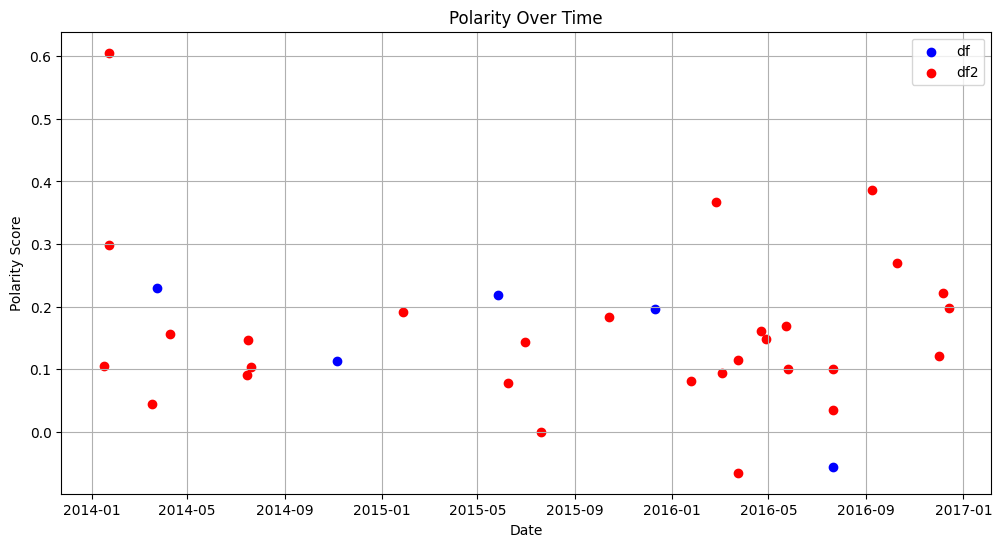

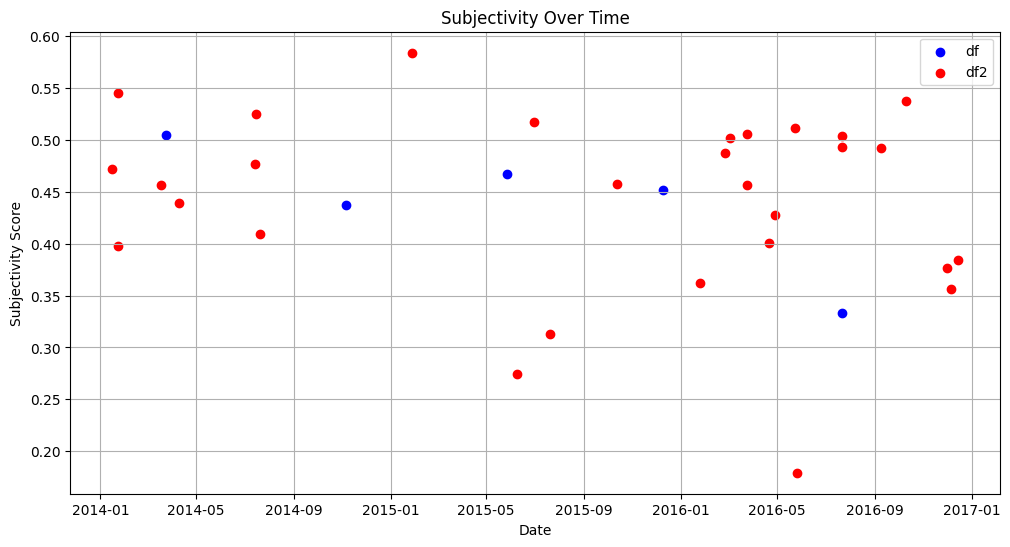

In [36]:
from textblob import TextBlob
import matplotlib.pyplot as plt

# Function to calculate polarity and subjectivity
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply the function to the 'Text' column of each DataFrame
df[['polarity', 'subjectivity']] = df['Text'].apply(lambda text: pd.Series(analyze_sentiment(text)))
df2[['polarity', 'subjectivity']] = df2['Text'].apply(lambda text: pd.Series(analyze_sentiment(text)))

# Convert the 'Date' column to datetime objects for plotting
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df2['Date'] = pd.to_datetime(df2['Date'], format='%d/%m/%Y')

# Plotting Polarity
plt.figure(figsize=(12, 6))
plt.scatter(df['Date'], df['polarity'], label='df', color='blue')
plt.scatter(df2['Date'], df2['polarity'], label='df2', color='red')
plt.title('Polarity Over Time')
plt.xlabel('Date')
plt.ylabel('Polarity Score')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Subjectivity
plt.figure(figsize=(12, 6))
plt.scatter(df['Date'], df['subjectivity'], label='df', color='blue')
plt.scatter(df2['Date'], df2['subjectivity'], label='df2', color='red')
plt.title('Subjectivity Over Time')
plt.xlabel('Date')
plt.ylabel('Subjectivity Score')
plt.legend()
plt.grid(True)
plt.show()


We can create a scattertext that compares the words in which each person uses:

In [37]:
nlp = spacy.load("en_core_web_sm")

def custom_parser(text):
  doc = nlp(text)
  parsed_text = ' '.join([token.lemma_ for token in doc
                           if token.pos_ in ['NOUN', 'ADJ', 'VERB', 'PROPN'] and not token.is_stop])
  return parsed_text

# Preprocess the text data before creating the corpus
df = pd.DataFrame({'text': [text, text2], 'category': ['text1', 'text2']})
df['parsed_text'] = df['text'].apply(custom_parser) # Apply the custom parser to the 'text' column

# Use the 'parsed_text' column when creating the corpus
corpus = st.CorpusFromPandas(
    df,
    category_col='category',
    text_col='parsed_text', # Use the preprocessed text column
    nlp=nlp
).build()

html = st.produce_scattertext_explorer(
    corpus,
    category='text1',
    category_name='Text 1',
    not_category_name='Text 2',
    minimum_term_frequency=5,
    width_in_pixels=1000
)

HTML(html)



We can observe from this that Bob Blackman might be more interested in education in a local sense, with some of his more frequent words being 'harrow', 'harrow council', 'resident' and 'constituency' - whereas Gareth Thomas might be more interested in it within the context of foreign affairs, some of his more frequent words being 'iran', 'nuclear', 'power' and 'negotiation'.

If we use different text data we can make similar comparisons between other politicians of interest.